In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/Sonar.csv")

In [2]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [25]:
df['Class'].unique()

array(['R', 'M'], dtype=object)

In [3]:
dum_df = pd.get_dummies(df, drop_first=True)

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [6]:
X = dum_df.iloc[:,0:-1]
y = dum_df.iloc[:,-1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [7]:
svc = SVC(probability = True,kernel='linear')
fitSVC = svc.fit(X_train, y_train)
y_pred = fitSVC.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[29  5]
 [12 17]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        34
           1       0.77      0.59      0.67        29

    accuracy                           0.73        63
   macro avg       0.74      0.72      0.72        63
weighted avg       0.74      0.73      0.72        63

0.7301587301587301


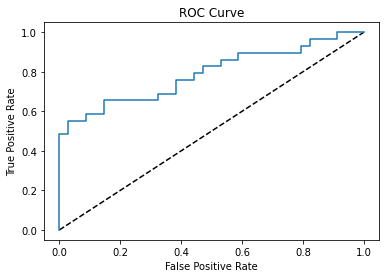

0.7900608519269777

In [8]:
# ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = svc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob)

In [16]:

########################### Tunning #####################################

########################## Grid Search CV #############################
from sklearn.model_selection import GridSearchCV

C_range = np.array([0.001,0.05,0.01,0.05,0.1,1,1.5,1.7,2,4])
# OR
#C_range = np.linspace(0.001,2)

param_grid = dict( C=C_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)
svmGrid = GridSearchCV(SVC(probability=True,kernel='linear'), 
                       param_grid=param_grid, cv=kfold, 
                       scoring="roc_auc")
svmGrid.fit(X, y)

# Best Parameters
print(svmGrid.best_params_)
#print(svmGrid.cv_results_)
print(svmGrid.best_score_)

{'C': 1.0}
0.8295683378406491


In [27]:
from sklearn.model_selection import GridSearchCV

C_range = np.linspace(0.01,4,10)
#C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
gamma_range = np.linspace(0.001, 10,10)
#gamma_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
df_range = ['ovo','ovr']

parameters = dict(gamma=gamma_range, C=C_range,
                  decision_function_shape=df_range)
#cv = StratifiedShuffleSplit(n_splits=5, train_size=2, test_size=None, random_state=42)
svc = SVC(probability = True,kernel='rbf')

from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2021,shuffle=True)
svmGrid = GridSearchCV(svc, param_grid=parameters, cv=kfold,verbose=3)
svmGrid.fit(X, y)

# Best Parameters
print(svmGrid.best_params_)

print(svmGrid.best_score_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END C=0.01, decision_function_shape=ovo, gamma=0.001;, score=0.524 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovo, gamma=0.001;, score=0.524 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovo, gamma=0.001;, score=0.548 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovo, gamma=0.001;, score=0.537 total time=   0.0s
[CV 5/5] END C=0.01, decision_function_shape=ovo, gamma=0.001;, score=0.537 total time=   0.0s
[CV 1/5] END C=0.01, decision_function_shape=ovo, gamma=1.1119999999999999;, score=0.524 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovo, gamma=1.1119999999999999;, score=0.524 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovo, gamma=1.1119999999999999;, score=0.548 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovo, gamma=1.1119999999999999;, score=0.537 total time=   0.0s
[CV 5/5] END C=0.01, decision

[CV 1/5] END C=0.01, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.524 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.524 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.548 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.537 total time=   0.0s
[CV 5/5] END C=0.01, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.537 total time=   0.0s
[CV 1/5] END C=0.01, decision_function_shape=ovr, gamma=8.889;, score=0.524 total time=   0.0s
[CV 2/5] END C=0.01, decision_function_shape=ovr, gamma=8.889;, score=0.524 total time=   0.0s
[CV 3/5] END C=0.01, decision_function_shape=ovr, gamma=8.889;, score=0.548 total time=   0.0s
[CV 4/5] END C=0.01, decision_function_shape=ovr, gamma=8.889;, score=0.537 total time=   0.0s
[CV 5/5] END C=0.01, decision_function_shape=ovr, gamma=8.889;, score=0.537 tota

[CV 5/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=2.223;, score=0.881 total time=   0.0s
[CV 2/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=2.223;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=2.223;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=2.223;, score=0.805 total time=   0.0s
[CV 5/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=2.223;, score=0.756 total time=   0.0s
[CV 1/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=3.334;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=3.334;, score=0.690 total time=   0.0s
[CV 3/5] END C=0.45333333333333337, decision_function_shape=ovr, gamma=3.334;, score=0.738 total time=   0.

[CV 4/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.659 total time=   0.0s
[CV 5/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.683 total time=   0.0s
[CV 1/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.833 total time=   0.0s
[CV 2/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.643 total time=   0.0s
[CV 3/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.690 total time=   0.0s
[CV 4/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.634 total time=   0.0s
[CV 5/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.683 total time=   0.0s
[CV 1/5] END C=0.8966666666666667, decision_function_shape=ovo, gamma=8.889;, score=0.810 total time=   0.0s
[CV 2/5] END C=0.8966666666666667, deci

[CV 2/5] END C=1.34, decision_function_shape=ovo, gamma=2.223;, score=0.833 total time=   0.0s
[CV 3/5] END C=1.34, decision_function_shape=ovo, gamma=2.223;, score=0.881 total time=   0.0s
[CV 4/5] END C=1.34, decision_function_shape=ovo, gamma=2.223;, score=0.829 total time=   0.0s
[CV 5/5] END C=1.34, decision_function_shape=ovo, gamma=2.223;, score=0.927 total time=   0.0s
[CV 1/5] END C=1.34, decision_function_shape=ovo, gamma=3.334;, score=0.905 total time=   0.0s
[CV 2/5] END C=1.34, decision_function_shape=ovo, gamma=3.334;, score=0.857 total time=   0.0s
[CV 3/5] END C=1.34, decision_function_shape=ovo, gamma=3.334;, score=0.833 total time=   0.0s
[CV 4/5] END C=1.34, decision_function_shape=ovo, gamma=3.334;, score=0.829 total time=   0.0s
[CV 5/5] END C=1.34, decision_function_shape=ovo, gamma=3.334;, score=0.902 total time=   0.0s
[CV 1/5] END C=1.34, decision_function_shape=ovo, gamma=4.445;, score=0.881 total time=   0.0s
[CV 2/5] END C=1.34, decision_function_shape=ovo, 

[CV 5/5] END C=1.34, decision_function_shape=ovr, gamma=8.889;, score=0.683 total time=   0.0s
[CV 1/5] END C=1.34, decision_function_shape=ovr, gamma=10.0;, score=0.833 total time=   0.0s
[CV 2/5] END C=1.34, decision_function_shape=ovr, gamma=10.0;, score=0.643 total time=   0.0s
[CV 3/5] END C=1.34, decision_function_shape=ovr, gamma=10.0;, score=0.690 total time=   0.0s
[CV 4/5] END C=1.34, decision_function_shape=ovr, gamma=10.0;, score=0.634 total time=   0.0s
[CV 5/5] END C=1.34, decision_function_shape=ovr, gamma=10.0;, score=0.683 total time=   0.0s
[CV 1/5] END C=1.7833333333333334, decision_function_shape=ovo, gamma=0.001;, score=0.524 total time=   0.0s
[CV 2/5] END C=1.7833333333333334, decision_function_shape=ovo, gamma=0.001;, score=0.524 total time=   0.0s
[CV 3/5] END C=1.7833333333333334, decision_function_shape=ovo, gamma=0.001;, score=0.548 total time=   0.0s
[CV 4/5] END C=1.7833333333333334, decision_function_shape=ovo, gamma=0.001;, score=0.537 total time=   0.0s

[CV 4/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=3.334;, score=0.829 total time=   0.0s
[CV 5/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=3.334;, score=0.902 total time=   0.0s
[CV 1/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=4.445;, score=0.881 total time=   0.0s
[CV 2/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=4.445;, score=0.786 total time=   0.0s
[CV 3/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=4.445;, score=0.833 total time=   0.0s
[CV 4/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=4.445;, score=0.805 total time=   0.0s
[CV 5/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=4.445;, score=0.829 total time=   0.0s
[CV 1/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=5.556;, score=0.905 total time=   0.0s
[CV 2/5] END C=1.7833333333333334, decision_function_shape=ovr, gamma=5.556;, score=0.762 total time=   0.0s
[CV 3/5] END C=1.78

[CV 4/5] END C=2.2266666666666666, decision_function_shape=ovo, gamma=10.0;, score=0.634 total time=   0.0s
[CV 5/5] END C=2.2266666666666666, decision_function_shape=ovo, gamma=10.0;, score=0.683 total time=   0.0s
[CV 1/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=0.001;, score=0.524 total time=   0.0s
[CV 2/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=0.001;, score=0.524 total time=   0.0s
[CV 3/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=0.001;, score=0.548 total time=   0.0s
[CV 4/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=0.001;, score=0.537 total time=   0.0s
[CV 5/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=0.001;, score=0.537 total time=   0.0s
[CV 1/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.929 total time=   0.0s
[CV 2/5] END C=2.2266666666666666, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.881 total time=   

[CV 3/5] END C=2.67, decision_function_shape=ovo, gamma=5.556;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.67, decision_function_shape=ovo, gamma=5.556;, score=0.756 total time=   0.0s
[CV 5/5] END C=2.67, decision_function_shape=ovo, gamma=5.556;, score=0.756 total time=   0.0s
[CV 1/5] END C=2.67, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.905 total time=   0.0s
[CV 2/5] END C=2.67, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.690 total time=   0.0s
[CV 3/5] END C=2.67, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.67, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.659 total time=   0.0s
[CV 5/5] END C=2.67, decision_function_shape=ovo, gamma=6.667000000000001;, score=0.756 total time=   0.0s
[CV 1/5] END C=2.67, decision_function_shape=ovo, gamma=7.7780000000000005;, score=0.833 total time=   0.0s
[CV 2/5] END C=2.67, decision_function_shape=ovo, gamma=7.77800000000000

[CV 5/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=2.223;, score=0.951 total time=   0.0s
[CV 1/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=3.334;, score=0.905 total time=   0.0s
[CV 2/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=3.334;, score=0.857 total time=   0.0s
[CV 3/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=3.334;, score=0.833 total time=   0.0s
[CV 4/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=3.334;, score=0.829 total time=   0.0s
[CV 5/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=3.334;, score=0.902 total time=   0.0s
[CV 1/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=4.445;, score=0.881 total time=   0.0s
[CV 2/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=4.445;, score=0.786 total time=   0.0s
[CV 3/5] END C=3.1133333333333333, decision_function_shape=ovo, gamma=4.445;, score=0.833 total time=   0.0s
[CV 4/5] END C=3.11

[CV 5/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=7.7780000000000005;, score=0.707 total time=   0.0s
[CV 1/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=8.889;, score=0.833 total time=   0.0s
[CV 2/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=8.889;, score=0.643 total time=   0.0s
[CV 3/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=8.889;, score=0.714 total time=   0.0s
[CV 4/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=8.889;, score=0.659 total time=   0.0s
[CV 5/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=8.889;, score=0.683 total time=   0.0s
[CV 1/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=10.0;, score=0.833 total time=   0.0s
[CV 2/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=10.0;, score=0.643 total time=   0.0s
[CV 3/5] END C=3.1133333333333333, decision_function_shape=ovr, gamma=10.0;, score=0.690 total time=   0.0s
[CV 4/5] 

[CV 5/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=3.334;, score=0.902 total time=   0.0s
[CV 1/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=4.445;, score=0.881 total time=   0.0s
[CV 2/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=4.445;, score=0.786 total time=   0.0s
[CV 3/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=4.445;, score=0.833 total time=   0.0s
[CV 4/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=4.445;, score=0.805 total time=   0.0s
[CV 5/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=4.445;, score=0.829 total time=   0.0s
[CV 1/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=5.556;, score=0.905 total time=   0.0s
[CV 2/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=5.556;, score=0.762 total time=   0.0s
[CV 3/5] END C=3.5566666666666666, decision_function_shape=ovr, gamma=5.556;, score=0.833 total time=   0.0s
[CV 4/5] END C=3.55

[CV 5/5] END C=4.0, decision_function_shape=ovo, gamma=10.0;, score=0.683 total time=   0.0s
[CV 1/5] END C=4.0, decision_function_shape=ovr, gamma=0.001;, score=0.524 total time=   0.0s
[CV 2/5] END C=4.0, decision_function_shape=ovr, gamma=0.001;, score=0.524 total time=   0.0s
[CV 3/5] END C=4.0, decision_function_shape=ovr, gamma=0.001;, score=0.548 total time=   0.0s
[CV 4/5] END C=4.0, decision_function_shape=ovr, gamma=0.001;, score=0.537 total time=   0.0s
[CV 5/5] END C=4.0, decision_function_shape=ovr, gamma=0.001;, score=0.537 total time=   0.0s
[CV 1/5] END C=4.0, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.929 total time=   0.0s
[CV 2/5] END C=4.0, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.881 total time=   0.0s
[CV 3/5] END C=4.0, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.905 total time=   0.0s
[CV 4/5] END C=4.0, decision_function_shape=ovr, gamma=1.1119999999999999;, score=0.829 total time=   0.0s
[CV 5/5] 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Admin\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

In [18]:
########################## Random Grid Search CV #################### 
from sklearn.model_selection import RandomizedSearchCV

C_range = np.linspace(0.001,4,100)
param_grid = dict( C=C_range)

rcv = RandomizedSearchCV(SVC(probability=True,kernel='linear'),
                        random_state=2021,
                        param_distributions=param_grid ,
                        cv=kfold,scoring='roc_auc',n_iter=10)

rcv.fit( X , y)

print(rcv.best_params_)
print(rcv.best_score_)  

{'C': 0.8896666666666666}
0.8300468067401706


In [26]:
from sklearn.model_selection import RandomizedSearchCV

C_range = np.linspace(0.01,5,10)
#C_range = np.array([0.01,0.05,0.1,1,1.5,1.7,2,4])
gamma_range = np.linspace(0.001, 15,10)
df_range = ['ovo','ovr']
rcv = RandomizedSearchCV(SVC(probability=True,decision_function_shape=df_range),
                        random_state=2021,
                        param_distributions=parameters ,
                        cv=kfold,n_iter=10)

rcv.fit( X , y)

print(rcv.best_params_)

print(rcv.best_score_)  

print(rcv.best_estimator_)


{'gamma': 2.223, 'decision_function_shape': 'ovo', 'C': 2.67}
0.8846689895470383
SVC(C=2.67, decision_function_shape='ovo', gamma=2.223, probability=True)
